# Classification

Pour ce deuxième volet du travail pratique, nous mettrons en œuvre un modèle de type Random Forest. L'objectif est double : d'une part, procéder à une nouvelle classification des individus, et d'autre part, identifier un ensemble restreint de variables pertinentes (aussi appelées Golden questions). L'analyse se décompose en deux cahiers numériques distincts : nous nous concentrerons d'abord sur l'analyse des variables oranges puis nous explorerons les variables vertes.

## Importation des bibliothèques et préparation des données

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from pandas.core.frame import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
n_estimators = 1000
data: DataFrame = pd.read_csv(filepath_or_buffer="../data/orange.csv")
data = data.drop(columns=["Respondent_ID"])
data


,cle,weight,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,...,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,cluster
0,1,2.501255,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
1,2,0.722914,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,3
2,3,1.039611,3,2,2,2,3,2,2,2,...,2,2,2,2,2,2,2,2,2,0
3,4,0.976590,1,2,2,2,3,2,3,2,...,1,2,3,3,3,2,2,1,2,0
4,5,0.812315,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.905997,3,2,3,4,3,2,2,2,...,1,2,1,1,1,1,1,1,1,3
4996,4997,1.257884,2,3,4,3,3,2,4,2,...,2,3,2,2,2,2,3,2,4,1
4997,4998,1.094695,3,4,4,3,2,2,4,4,...,2,3,3,3,2,3,3,2,3,1
4998,4999,2.022023,3,3,4,3,3,2,3,3,...,3,2,3,2,3,2,2,1,3,1


In [3]:
data.dtypes


cle               int64
weight          float64
A9_1_slice        int64
A9_2_slice        int64
A9_3_slice        int64
A9_4_slice        int64
A9_5_slice        int64
A9_6_slice        int64
A9_7_slice        int64
A9_8_slice        int64
A9_9_slice        int64
A9_10_slice       int64
A9_11_slice       int64
A9_12_slice       int64
A9_13_slice       int64
A9_14_slice       int64
A9_15_slice       int64
A9_16_slice       int64
A10_1_slice       int64
A10_2_slice       int64
A10_3_slice       int64
A10_4_slice       int64
A10_5_slice       int64
A10_6_slice       int64
A10_7_slice       int64
A10_8_slice       int64
A11_1_slice       int64
A11_2_slice       int64
A11_3_slice       int64
A11_4_slice       int64
A11_5_slice       int64
A11_6_slice       int64
A11_7_slice       int64
A11_8_slice       int64
A11_9_slice       int64
A11_10_slice      int64
A11_11_slice      int64
A11_12_slice      int64
A11_13_slice      int64
cluster           int64
dtype: object

## Entraînement du Random Forest

In [4]:
X: DataFrame = data.drop(columns=['cluster'])
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

## Evaluation

In [6]:
y_pred = rf_model.predict(X_test)

In [7]:
print("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.928
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       619
           1       0.90      0.92      0.91       423
           2       1.00      0.86      0.92       114
           3       0.96      0.94      0.95       344

    accuracy                           0.93      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.93      0.93      0.93      1500



Nous pouvons voir que notre modèle montre d'excellentes performances avec une précision globale de 92.8%. Le modèle performe particulièrement bien pour la classe 2 avec une précision parfaite de 1.00, bien que son rappel soit légèrement plus faible à 0.86. Les classes 0, 1 et 3 affichent toutes des performances équilibrées avec des scores F1 supérieurs à 0.90, la classe 3 étant la plus performante avec un score F1 de 0.95.

## Identification des variables importantes

In [8]:
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df: DataFrame = pd.DataFrame(data={'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
9,A9_8_slice,0.054836
32,A11_7_slice,0.052725
30,A11_5_slice,0.051633
33,A11_8_slice,0.046888
36,A11_11_slice,0.046582
38,A11_13_slice,0.043293
5,A9_4_slice,0.041781
35,A11_10_slice,0.041338
4,A9_3_slice,0.040899
2,A9_1_slice,0.036730


C:\Users\marti\AppData\Local\Temp\ipykernel_84532\3589071601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df,


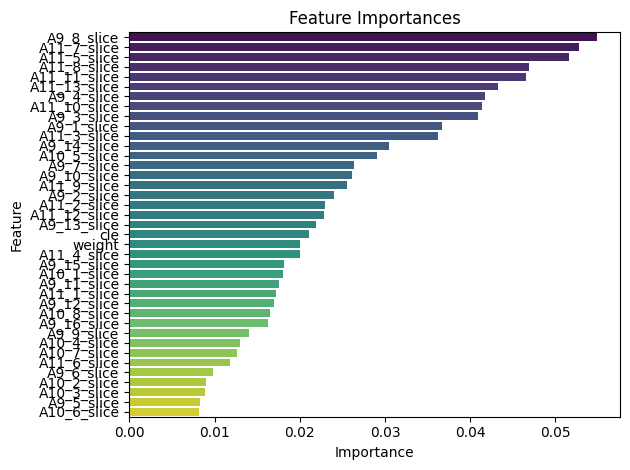

In [9]:
sns.barplot(data=importance_df, 
            y='Feature', 
            x='Importance',
            palette='viridis')

plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

## Minimiser les variables

In [10]:
num_goldens = range(39, 0, -1)
accuracies = []
for golden_num in num_goldens:
    selected_features = importance_df['Feature'].head(n=golden_num).tolist()
    X_train_reduced = X_train[selected_features]
    X_test_reduced = X_test[selected_features]
    rf_model_reduced = RandomForestClassifier(n_estimators=n_estimators, random_state=23)
    rf_model_reduced.fit(X=X_train_reduced, y=y_train)
    y_reduced_pred = rf_model_reduced.predict(X=X_test_reduced)
    accuracies.append(accuracy_score(y_true=y_test, y_pred=y_reduced_pred))


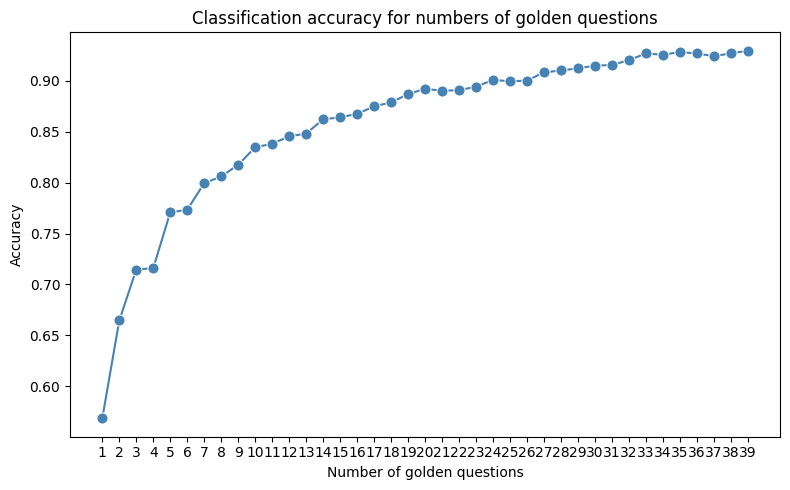

In [11]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=num_goldens, y=accuracies, marker="o", markersize=8, color="steelblue")

plt.title("Classification accuracy for numbers of golden questions")
plt.xlabel("Number of golden questions")
plt.ylabel("Accuracy")
plt.xticks(num_goldens)
plt.tight_layout()
plt.show()

Les analyses montrent que 26 golden questions permettent déjà d'atteindre une performance de 90%, avec une progression limitée jusqu'à 92.8% au-delà de ce nombre. Par ailleurs, au-delà de 34 questions, la performance stagne ou peut même se dégrader. L'optimum se situe donc dans l'intervalle entre 26 et 34 golden questions.

In [12]:
num_goldens = range(26, 35)
accuracies = {0: [], 1: [], 2: [], 3: []}

for golden_num in num_goldens:
    selected_features = importance_df['Feature'].head(n=golden_num).tolist()
    X_train_reduced = X_train[selected_features]
    X_test_reduced = X_test[selected_features]
    rf_model_reduced = RandomForestClassifier(n_estimators=n_estimators, random_state=23)
    rf_model_reduced.fit(X=X_train_reduced, y=y_train)
    y_reduced_pred = rf_model_reduced.predict(X_test_reduced)
    report = classification_report(y_true=y_test, y_pred=y_reduced_pred, output_dict=True)
    accuracies[0].append(report['0']['precision']) #type: ignore
    accuracies[1].append(report['1']['precision']) #type: ignore
    accuracies[2].append(report['2']['precision']) #type: ignore
    accuracies[3].append(report['3']['precision']) #type: ignore

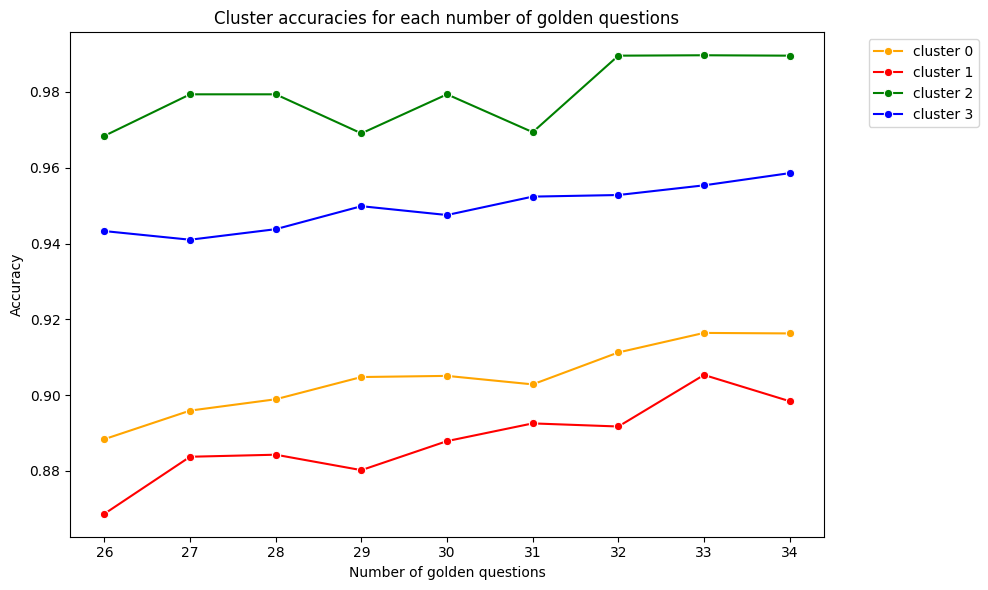

In [13]:
plt.figure(figsize=(10, 6))
for cluster, color in zip([0, 1, 2, 3], ['orange', 'red', 'green', 'blue']):
    sns.lineplot(x=num_goldens, 
                y=accuracies[cluster], 
                label=f"cluster {cluster}",
                marker='o',
                markersize=6,
                color=color)

plt.title("Cluster accuracies for each number of golden questions")
plt.xlabel("Number of golden questions")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

L'augmentation du nombre de golden questions au-delà de 26 n'apporte qu'une amélioration marginale de la précision pour chaque cluster. Par conséquent, nous avons fixé à 26 le nombre optimal de golden questions pour cette enquête.

## Classification verte

In [14]:
data = pd.read_csv("../data/vert.csv")
data = data.drop(columns=["Respondent_ID"])
data

,cle,weight,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,...,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,cluster
0,1,2.501255,1,0,0,0,1,2.0,0.0,2,...,2,2,2,2,2,2,2,2,2,3
1,2,0.722914,1,0,0,0,1,5.0,0.0,2,...,4,4,4,4,4,4,4,4,4,1
2,3,1.039611,1,0,0,0,1,2.0,0.0,5,...,4,4,4,4,4,4,4,4,4,1
3,4,0.976590,1,1,1,0,1,1.0,0.0,2,...,4,4,5,5,5,5,5,4,4,4
4,5,0.812315,0,1,0,0,2,0.0,1.0,1,...,4,4,4,4,4,4,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.905997,1,0,1,0,3,0.0,1.0,5,...,4,4,5,5,5,5,5,4,5,2
4996,4997,1.257884,0,1,0,0,2,0.0,1.0,1,...,4,5,5,5,5,5,5,5,5,2
4997,4998,1.094695,0,1,0,0,2,0.0,2.0,1,...,5,5,5,5,5,5,5,5,5,2
4998,4999,2.022023,0,0,1,0,3,0.0,1.0,1,...,5,4,5,5,5,5,5,5,5,2


In [15]:
data.dtypes

cle             int64
weight        float64
A11             int64
A12             int64
A13             int64
A14             int64
A4              int64
A5            float64
A5bis         float64
A8_1_slice      int64
A8_2_slice      int64
A8_3_slice      int64
A8_4_slice      int64
B1_1_slice      int64
B1_2_slice      int64
B2_1_slice      int64
B2_2_slice      int64
B3              int64
B4              int64
B6              int64
C1_1_slice      int64
C1_2_slice      int64
C1_3_slice      int64
C1_4_slice      int64
C1_5_slice      int64
C1_6_slice      int64
C1_7_slice      int64
C1_8_slice      int64
C1_9_slice      int64
cluster         int64
dtype: object

## Entraînement du Random Forest

In [16]:
X: DataFrame = data.drop(columns=['cluster'])
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.9373333333333334
              precision    recall  f1-score   support

           0       0.96      0.80      0.88        97
           1       0.90      0.87      0.88       365
           2       0.94      0.99      0.97       373
           3       0.93      0.86      0.90        95
           4       0.95      0.98      0.97       570

    accuracy                           0.94      1500
   macro avg       0.94      0.90      0.92      1500
weighted avg       0.94      0.94      0.94      1500



Cette classification sur les variables vertes montre une performance globale légèrement supérieure avec une accuracy de 93.7% contre 92.8% pour les variables oranges. La différence majeure réside dans la distribution des classes : les variables vertes ont 5 classes (0-4) contre 4 pour les oranges. Malgré cette complexité accrue, le modèle maintient d'excellentes performances avec des scores F1 particulièrement élevés pour les classes 2 et 4 (0.97). On note cependant quelques déséquilibres, notamment pour la classe 0 avec un rappel de 0.80. En comparaison avec les variables oranges, ce modèle montre une meilleure précision moyenne (0.94 vs 0.93) mais avec une distribution plus hétérogène entre les classes. Globalement, les variables vertes semblent permettre une meilleure classification malgré un nombre supérieur de classes à prédire.

## Identification des variables importantes

In [20]:
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df: DataFrame = pd.DataFrame(data={'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
8,A5bis,0.090931
7,A5,0.089892
6,A4,0.078890
11,A8_3_slice,0.052069
28,C1_9_slice,0.049758
9,A8_1_slice,0.048432
27,C1_8_slice,0.046401
20,C1_1_slice,0.045989
26,C1_7_slice,0.044595
2,A11,0.042032


C:\Users\marti\AppData\Local\Temp\ipykernel_84532\3589071601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df,


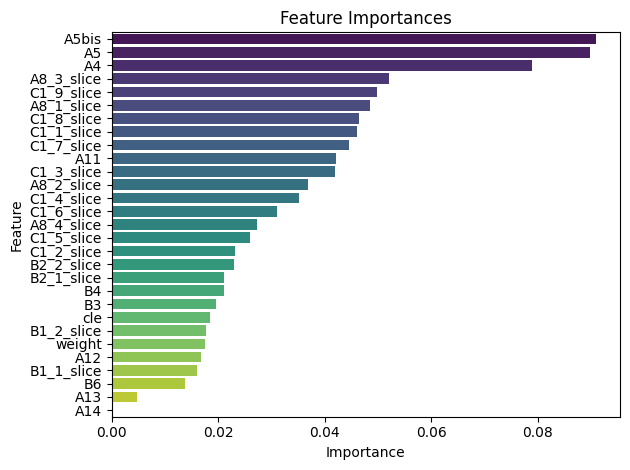

In [21]:
sns.barplot(data=importance_df, 
            y='Feature', 
            x='Importance',
            palette='viridis')

plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

## Minimiser les variables

In [22]:
num_goldens = range(39, 0, -1)
accuracies = []
for golden_num in num_goldens:
    selected_features = importance_df['Feature'].head(n=golden_num).tolist()
    X_train_reduced = X_train[selected_features]
    X_test_reduced = X_test[selected_features]
    rf_model_reduced = RandomForestClassifier(n_estimators=n_estimators, random_state=23)
    rf_model_reduced.fit(X=X_train_reduced, y=y_train)
    y_reduced_pred = rf_model_reduced.predict(X=X_test_reduced)
    accuracies.append(accuracy_score(y_true=y_test, y_pred=y_reduced_pred))


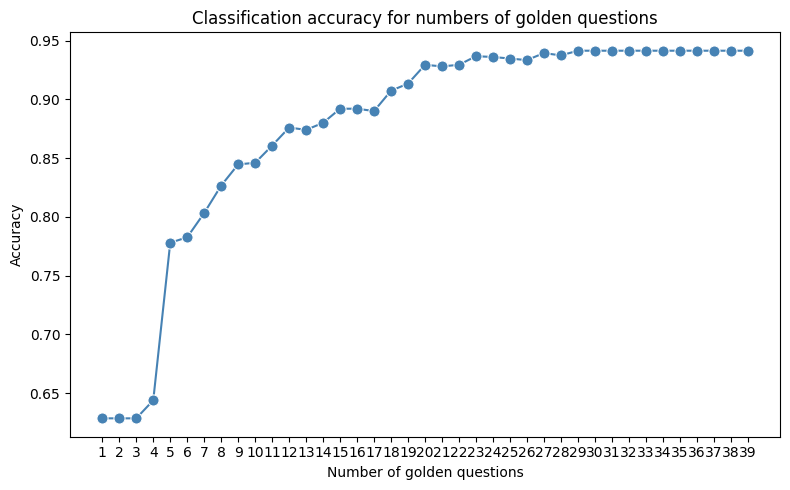

In [23]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=num_goldens, y=accuracies, marker="o", markersize=8, color="steelblue")

plt.title("Classification accuracy for numbers of golden questions")
plt.xlabel("Number of golden questions")
plt.ylabel("Accuracy")
plt.xticks(num_goldens)
plt.tight_layout()
plt.show()

L'analyse des résultats met en évidence une amélioration significative de l'accuracy dès que l'on atteint 17 golden questions. Au-delà de 29 questions, on observe une stagnation des performances, l'augmentation devenant négligeable. Ces observations nous permettent de définir un intervalle d'intérêt entre 17 et 29 golden questions, dans lequel nous pourrons déterminer le nombre optimal de questions à utiliser.